In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import birdsonganalysis as bsa
from scipy.signal import gaussian as gausswin
from IPython.display import Audio


In [27]:
sr = 44100
tone = 880
dur = 1
pure_tone = np.sin(np.linspace(0, dur, int(dur * sr)) * 2 * np.pi * tone) * gausswin(int(dur * sr), std=dur*sr/5)

dual_tone = pure_tone + 0.5 * np.sin(np.linspace(0, dur, int(dur * sr)) * 2 * np.pi * 2.5 * tone) * gausswin(int(dur * sr), std=dur*sr/5)
noisy_tone = np.where(np.arange(dur * sr) % 1000 <= 10, 0, pure_tone)

In [28]:
Audio(pure_tone, rate=sr)

In [29]:
Audio(dual_tone, rate=sr)

In [30]:
Audio(noisy_tone, rate=sr)

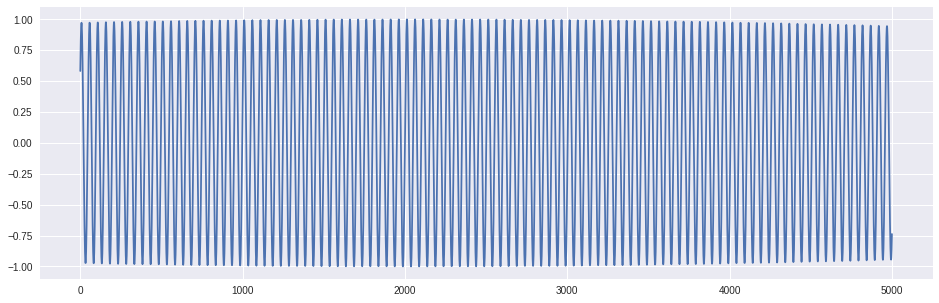

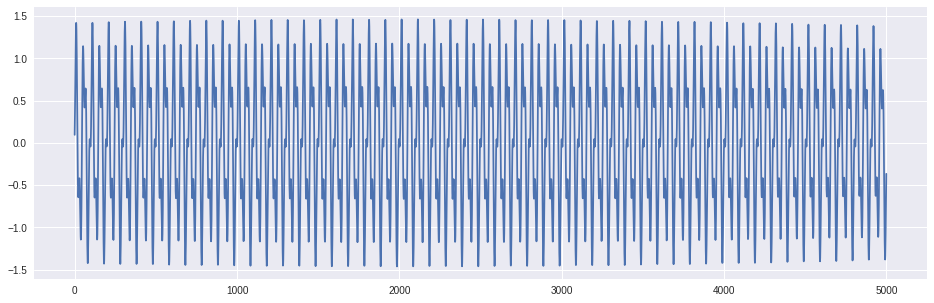

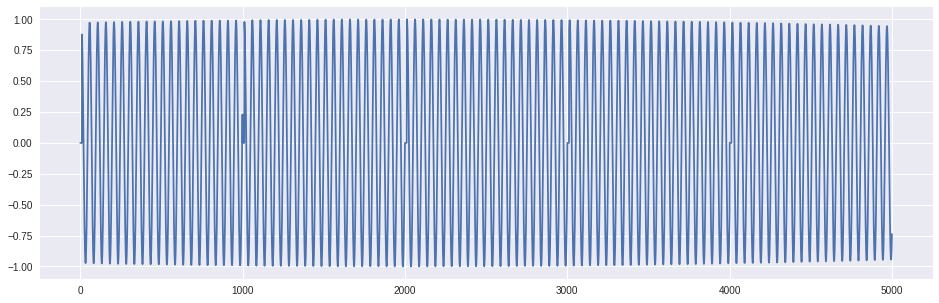

In [31]:
plt.figure(figsize=(16, 5))
plt.plot(pure_tone[20000:25000])
plt.figure(figsize=(16, 5))
plt.plot(dual_tone[20000:25000])
plt.figure(figsize=(16, 5))
plt.plot(noisy_tone[20000:25000])

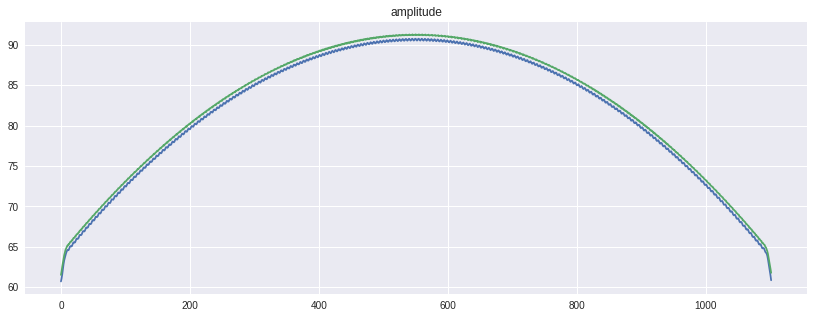

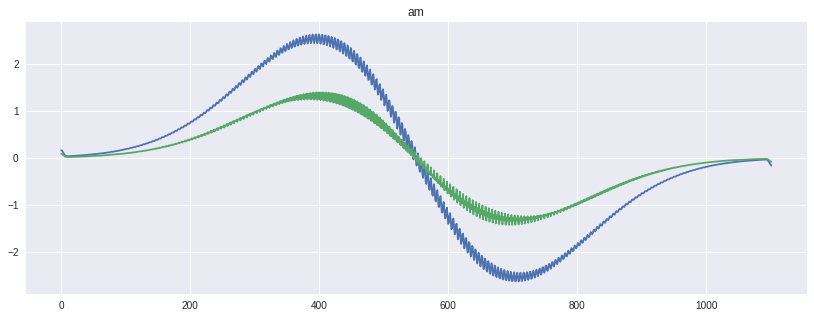

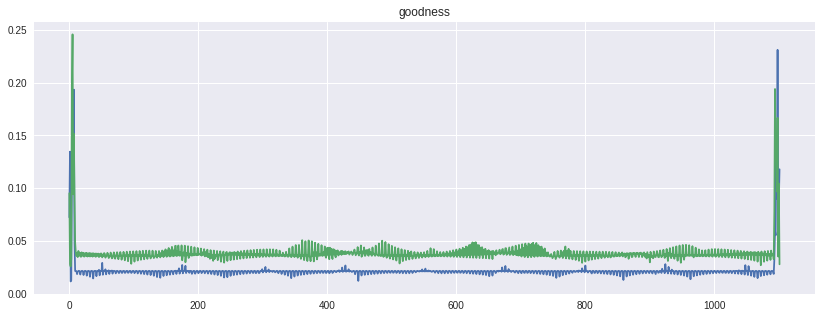

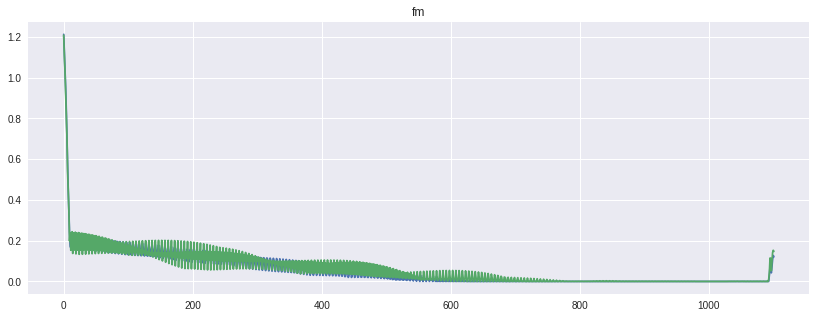

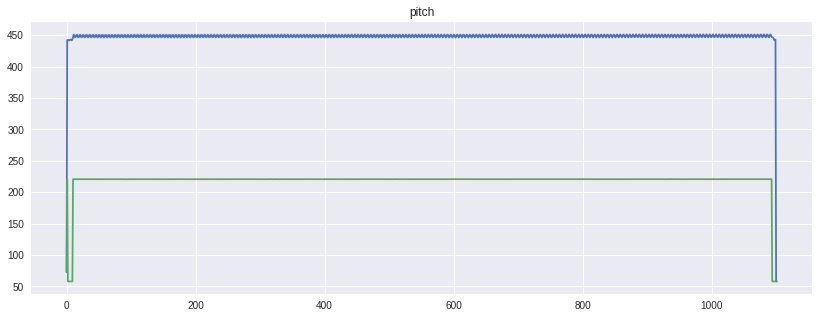

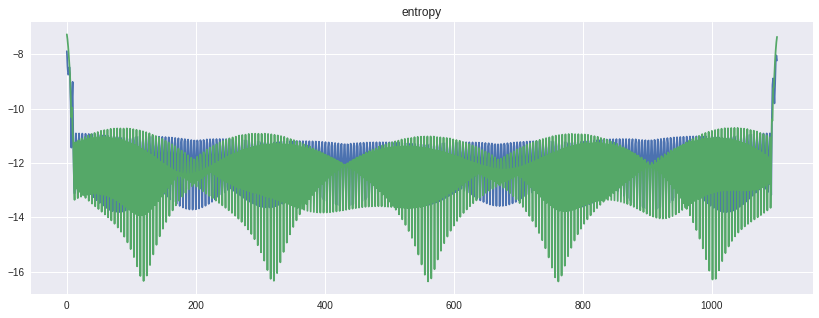

In [23]:

feat = bsa.all_song_features(pure_tone, sr, pitch_threshold=0.2)
dfeat = bsa.all_song_features(dual_tone, sr, pitch_threshold=0.2)
for fname in feat:
    plt.figure(figsize=(14, 5))
    plt.plot(feat[fname])
    plt.plot(dfeat[fname])
    plt.title(fname)
    plt.show()

Adding noise increase Wiener entropy